<a href="https://colab.research.google.com/github/ezrafield/ibm-certificate-final/blob/main/SIFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from: https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/


# Keypoint Descriptor

### Import

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### Read image

In [2]:
import urllib
import numpy as np

req = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg/640px-Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr, -1)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)


### Keypoints

In [4]:
sift = cv2.xfeatures2d.SIFT_create()
keypoints1, description1 = sift.detectAndCompute(img1, None)
"""
sift.detectAndCompute:
  input: image 8bit grayscale
  output:
    - keypoints:
      + pt: coordinates [x, y]
      + size: đường kính tìm neighborhood
      + angle: hướng keypoint(-1 nếu không dùng), trong [0, 360] degree theo y-axis xoay theo chiều đồng hồ
      + response: có most strong keypoints không. Có thể dùng để sorting và subsampling
      + octave: pyramid layer mà keypoint được đánh dấu
      + class_id: object class (nếu cần clustered)
    - descriptors: số keypoints N * 128D vector matrix
"""

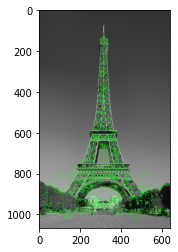

In [7]:
img1draw = img1.copy()
img1draw = cv2.drawKeypoints(gray1, keypoints1, 0, (0, 255, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
"""
cv2.drawKeypoints:
  input_image: đã qua SURF hoặc SIFT
  key_points: tập keypoints theo form data 
  output_image
  colour: colour chung, nếu không sẽ có đủ màu
  flag: thể loại vẽ
"""
plt.imshow(img1draw)

# Feature Matching

## read 2 image

In [8]:
import urllib
import numpy as np

req1 = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg/640px-Tour_Eiffel_Wikimedia_Commons_%28cropped%29.jpg')
arr1 = np.asarray(bytearray(req1.read()), dtype=np.uint8)
img1 = cv2.imdecode(arr1, -1)

req2 = urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSjxmhPsMNWZp8gfPlp5MLaNMKuq1rU0FDX7g&usqp=CAU')
arr2 = np.asarray(bytearray(req2.read()), dtype=np.uint8)
img2 = cv2.imdecode(arr2, -1)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

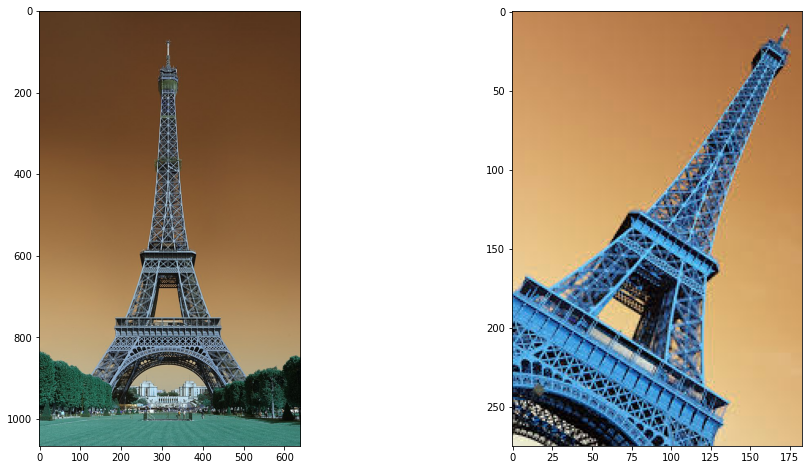

In [11]:
figure, ax = plt.subplots(1, 2, figsize = (16, 8))

ax[0].imshow(img1, cmap = 'gray')
ax[1].imshow(img2, cmap = 'gray')

## Keypoints found

In [14]:
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

len(keypoints1), len(keypoints2)

(2369, 362)

## Matching

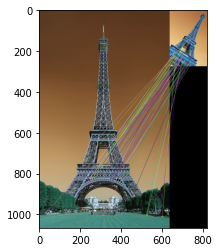

(<matplotlib.image.AxesImage at 0x7f39b366dc90>, None)

In [17]:
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck = True)
# NORM_L1 : Euclide distance
# BFMatcher : Brute Force -> cross check : match theo dạng cross join -> object xử lí match

matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x: x.distance)

img3 = cv2.drawMatches(img1, keypoints1, img2, keypoints2, matches[:50], img2, flags = 2)
# chỉ lấy 50 match có delta f nhỏ nhất
plt.imshow(img3), plt.show()


# Thử với ảnh mới

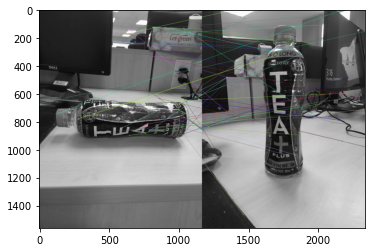

(<matplotlib.image.AxesImage at 0x7f39b35a6090>, None)

In [18]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

# read images
img1 = cv2.imread('/content/307428789_1721941208171966_1730440010957385284_n.jpg')  
img2 = cv2.imread('/content/307566884_1510862159364268_3578626327469894498_n.jpg') 

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()